#### This is basic project to Machine Learning using the Iris Dataset. You can learn how to implement a machine learning to a given dataset by following this notebook. I have explained everything related to the implementation in detail . Hope you find it useful.

## Import necessary libraries


In [1]:
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np

## Load the Iris dataset


In [2]:
iris = load_iris()

## Separate features and labels


In [3]:
features = iris.data.T
sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

## Define feature labels

In [4]:
sepal_length_label = iris.feature_names[0]
sepal_width_label = iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

## Define a function for splitting data into training, validation, and test sets


In [5]:
def train_validate_test_split(data, labels, testRatio, valRatio):
    total_samples = len(data)
    test_size = int(total_samples * testRatio)
    val_size = int(total_samples * valRatio)

    data, labels = shuffle(data, labels,random_state=42)
    
    X_test = data[:test_size]
    y_test = labels[:test_size]

    X_val = data[test_size:(test_size + val_size)]
    y_val = labels[test_size:(test_size + val_size)]

    X_train = data[(test_size + val_size):]
    y_train = labels[(test_size + val_size):]

    return X_train, X_test, X_val, y_train, y_test ,y_val

## Split the data into training, validation, and test sets


In [6]:
X_train, X_test, X_val, y_train, y_test ,y_val  = train_validate_test_split(iris.data, iris.target,testRatio=0.3, valRatio=0.3)

## Train a Gaussian Naive Bayes classifier


In [7]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Define a function to calculate accuracy


In [8]:
def calculate_accuracy(predicted_y, y):
    correct_predictions = (predicted_y == y).sum()
    total_samples = len(y)
    accuracy = correct_predictions / total_samples
    return accuracy

## Evaluate the classifier's accuracy on the test set


In [9]:
predicted_labels = classifier.predict(X_test)
accuracy = calculate_accuracy(predicted_labels, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


## Plot decision boundaries to visualize the classifier's performance


In [10]:
def plot_decision_boundaries(X, y, clf, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)

    h = .01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.show()


## Prepare data for plotting decision boundaries (using only petal length and petal width)


In [11]:
X_train = X_train[:, 2:]
X_val = X_val[:, 2:]
X_test = X_test[:, 2:]

## Retrain the classifier on reduced feature set

In [12]:
classifier.fit(X_train, y_train)

GaussianNB()

## Plot decision boundaries for training, validation, and test sets


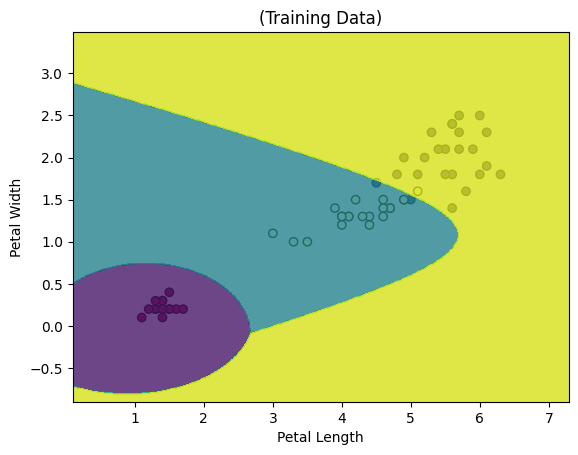

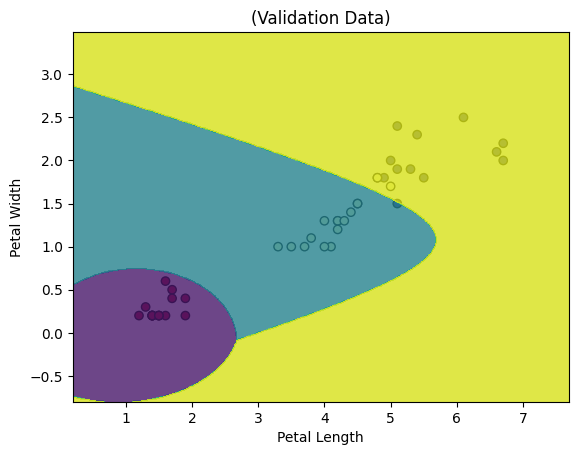

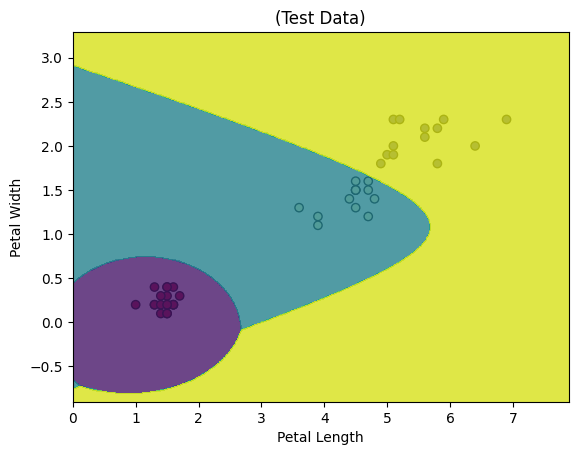

In [13]:
plot_decision_boundaries(X_train, y_train, classifier, '(Training Data)')
plot_decision_boundaries(X_val, y_val, classifier, '(Validation Data)')
plot_decision_boundaries(X_test, y_test, classifier, '(Test Data)')

### Make a prediction using a new data point


In [14]:
X_new = np.array([[1.0,0.5]])
prediction = classifier.predict(X_new)
print(prediction)

[0]
